# Proyek Analisis Data: [Air Quality Dataset]

- Nama: Andiko Putra Pratama Krisdiawan
- Email: andikoputra27@gmail.com
- ID Dicoding: andiko_putra

# Menentukan Pertanyaan Bisnis

- Bagaimana perubahan tingkat polusi udara pada tiap titik pengamatan?
- Titik mana saja yang menghasilkan polusi terbanyak?
- Substansi apa yang paling berdampak atas kadar polusi udara?

# Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data
Test Case dengan 1 Data

Mengekspor data dari dataset yang diberikan pada directory _data_. Sebelum data dieksplor lebih jauh, digunakan salah satu data terlebih dahulu sebagai test case untuk mengetahui informasi apa saja yang dapat diambil

In [3]:
data1_pd = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv', delimiter = ',')


## Data Assessing

In [4]:
data1_pd.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [211]:
data1_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dapat diperhatikan bahwa terdapat beberapa nilai NaN yang dapat memengaruhi distribusi data. Pada proses dibawah , diambil nilai mean() dan max() untuk perlakuan selanjutnya.

Dikarenakan terdapat banyak sekali informasi dalam data yang diberikan, dengan alokasi memori mencapai 4.8 mb hanya untuk satu dataset, kuantitas data dikompres sehingga didapatkan informasi per hari dan bukannya per jam. Hanya beberapa data yang digunakan seperti indikator PM2.5 hingga O3 sebagai indikator polusi

Diambil nilai mean dari seluruh kolom, sementara nilai max untuk CO dan O3. Hal ini mengikuti ketentuan Air Quality Index yang mana, dikarenakan bahaya CO dan O3 terhadap lingkungan dan manusia, diambil nilai maksimum per hari

## Data Cleaning

In [411]:
data1_pd['date'] = pd.to_datetime(data1_pd[['year', 'month', 'day']])
grouped_data = data1_pd.groupby(by = ['station', 'date']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'max',
    'O3': 'max',
}).reset_index()

In [214]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  1461 non-null   object        
 1   date     1461 non-null   datetime64[ns]
 2   PM2.5    1445 non-null   float64       
 3   PM10     1445 non-null   float64       
 4   SO2      1280 non-null   float64       
 5   NO2      1444 non-null   float64       
 6   CO       1414 non-null   float64       
 7   O3       1409 non-null   float64       
 8   TEMP     1461 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 102.9+ KB


Informasi yang didapat pada grouped_data menunjukkan bahwa terdapat nilai nan pada masing-masing data numerik. Dengan count nan terbanyak pada SO2. Hal ini diatasi melalui interpolasi linear pada data

In [215]:
for data in grouped_data.columns.tolist()[2:]:
    grouped_data[data].interpolate(method='linear',limit_direction='both',
                    inplace = True)

In [413]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  1461 non-null   object        
 1   date     1461 non-null   datetime64[ns]
 2   PM2.5    1446 non-null   float64       
 3   PM10     1446 non-null   float64       
 4   SO2      1442 non-null   float64       
 5   NO2      1444 non-null   float64       
 6   CO       1430 non-null   float64       
 7   O3       1444 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 91.4+ KB


## Automatisasi Proses Data Wrangling untuk Dataset lain

### Fungsi

Dipersiapkan fungsi otomasi untuk data-data lainnya seperti yang telah dilakukan pada test case sebelumnya

In [422]:
#fungsi untuk mengubah csv menjadi data dan menginterpolasi data
def csv_to_data(file):
    data = pd.read_csv(file, delimiter = ',')

    data['date'] = pd.to_datetime(data[['year', 'month', 'day']]).dt.strftime('%Y-%m-%d')
    data = data.groupby(by = ['station', 'date']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'max',
    'O3': 'max'
    }).reset_index()
    
    for col in data.columns.tolist()[2:]:
        data[col].interpolate(method='linear',limit_direction='both',
                    inplace = True)
    return data


### Menyelesaikan Data-Data Lainnya

Dengan fungsi-fungsi di atas, data dari beberapa dataset pada directory dapat dipersiapkan

In [423]:
import os
def all_df(dir):
    result_df = pd.DataFrame()
    file_names = os.listdir(dir)
    for file_name in file_names:
        this_data = csv_to_data(f'{dir}/{file_name}')

        result_df = pd.concat([result_df, this_data], axis=0)
    return result_df

In [424]:
pollution_df = all_df('./data')

In [427]:
pollution_df.head()

,station,date,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-03-01,7.125000,10.750000,11.708333,22.583333,700.0,77.0
1,Aotizhongxin,2013-03-02,30.750000,42.083333,36.625000,66.666667,1700.0,52.0
2,Aotizhongxin,2013-03-03,76.916667,120.541667,61.291667,81.000000,2799.0,77.0
3,Aotizhongxin,2013-03-04,22.708333,44.583333,22.869565,46.956522,1300.0,84.0
4,Aotizhongxin,2013-03-05,148.875000,183.791667,93.875000,132.833333,4400.0,84.0


In [425]:
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  17532 non-null  object 
 1   date     17532 non-null  object 
 2   PM2.5    17532 non-null  float64
 3   PM10     17532 non-null  float64
 4   SO2      17532 non-null  float64
 5   NO2      17532 non-null  float64
 6   CO       17532 non-null  float64
 7   O3       17532 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [426]:
pollution_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3
count,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,79.815825,104.684603,15.856188,50.629663,2187.529803,114.659643
std,69.405223,74.601806,18.441500,28.223239,1632.594517,76.668214
min,3.000000,4.833333,0.714000,2.000000,100.000000,0.214200
25%,30.083333,49.083333,3.791667,30.500000,1100.000000,60.142650
50%,60.458333,87.458333,8.954545,45.625000,1700.000000,94.000000
75%,107.458333,137.483696,20.291667,65.083333,2800.000000,160.000000
max,567.416667,584.666667,158.318182,201.285714,10000.000000,1071.000000


# Exploratory Data

Tahapan exploratory data kali ini dilakukan untuk menjawab rumusan masalah yang telah disebutkan

Tujuan dari tahapan exploratory data berdasarkan rumusan masalah di atas berupa:

- Mengetahui perubahan tingkat polusi udara pada tiap titik pengamatan dengan membagi dataframe pada tiap _station_ 
- Mengetahui titik pengamatan penghasil polusi terbanyak dengan membandingkan kadar polusi pada tiap _station_
- Mengetahui substansi yang paling bertanggung jawab atas kadar polusi dengan membandingkan kadar polusi pada tiap indeks kolom pada tiap _station_

In [428]:
#mengetahui nama dari tiap station
pollution_df['station'].unique().tolist()

['Aotizhongxin',
 'Changping',
 'Dingling',
 'Dongsi',
 'Guanyuan',
 'Gucheng',
 'Huairou',
 'Nongzhanguan',
 'Shunyi',
 'Tiantan',
 'Wanliu',
 'Wanshouxigong']

## 1. Pollution Level

Fungsi di bawah mengambil sebagian dataframe pollution_df terhadap tiap station, dengan demikian, perubahan konsentrasi polutan dapat diamati

In [429]:
def pollution_level(df,pos):
    return df[df['station'] == pos]

In [430]:
pollution_level(pollution_df, 'Aotizhongxin').head()

,station,date,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-03-01,7.125000,10.750000,11.708333,22.583333,700.0,77.0
1,Aotizhongxin,2013-03-02,30.750000,42.083333,36.625000,66.666667,1700.0,52.0
2,Aotizhongxin,2013-03-03,76.916667,120.541667,61.291667,81.000000,2799.0,77.0
3,Aotizhongxin,2013-03-04,22.708333,44.583333,22.869565,46.956522,1300.0,84.0
4,Aotizhongxin,2013-03-05,148.875000,183.791667,93.875000,132.833333,4400.0,84.0


## 2. Pollution Region

Fungsi di bawah mengelompokkan dataframe pollution_df terhadap nilai mean dari tiap konsentrasi polutan berdasarkan tiap region untuk dibandingkan satu sama lain

In [431]:
def pollution_region(df):
    df = df.groupby(by = 'station').agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'SO2': 'mean',
        'NO2': 'mean',
        'CO': 'mean',
        'O3': 'mean'
    }).reset_index()
    return df


In [432]:
pollution_region(pollution_df)

,station,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,82.189606,109.663922,17.414780,59.022652,2236.118412,113.499264
1,Changping,70.991026,94.582649,14.928178,44.207787,2092.110883,111.260022
2,Dingling,66.424660,83.812942,11.778181,27.445197,1563.778234,123.826073
3,Dongsi,86.236291,110.318866,18.488571,54.147722,2329.962355,113.739642
4,Guanyuan,82.957667,109.141382,17.584903,58.089566,2177.151951,112.536907
5,Gucheng,84.061237,119.080492,15.434735,55.999209,2305.447639,116.832430
6,Huairou,69.873976,92.139928,12.281557,32.199733,1801.010267,116.910284
7,Nongzhanguan,84.915556,109.250225,18.733592,58.170312,2382.829911,118.328460
8,Shunyi,79.538003,98.902527,13.423561,43.753338,2313.936687,112.464737
9,Tiantan,82.029531,106.332842,14.445891,53.318655,2290.388775,119.507564


## 3. Pollution Particle

Fungsi di bawah mengelompokkan pollution_df berdasarkan nilai mean data polutan

In [433]:
def pollution_part(df):
    data = {}
    for column in df.columns.tolist()[2:]:
        data[column] = [df[column].mean()]
    data = pd.DataFrame(data)
    return data


In [434]:
pollution_part_df = pollution_part(pollution_df)
pollution_part_df

,PM2.5,PM10,SO2,NO2,CO,O3
0,79.815825,104.684603,15.856188,50.629663,2187.529803,114.659643


Selanjutnya untuk mengetahui dampak tiap polutan, digunakan *Air Quality Index (AQI)* pada tiap jenis polutan. Dictionary di bawah digunakan untuk menyimpan data terkait kategori AQI, threshold value, dan threshold index pada tiap polutan. Hal ini menunjukkan bahwa tiap polutan memiliki dampak yang berbeda-beda tergantung konsentrasinya

In [435]:
aqi_index = {
    'index': [0,50,100,150,200,300,500],
    'category': ['Good', 'Moderate', 'Quite Unhealthy', 'Unhealthy',
                 'Very Unhealthy', 'Hazardous', 'Hazardous'],
    'PM2.5': [0,12,35.4,55.4,150.4,250.4,500.4],
    'PM10': [0,54,154,254,354,424,604],
    'SO2': [0,35,75,185,304,604,1004],
    'NO2': [0,53,100,360,649,1249,2049],
    'CO': [0,440,940,1240,1540,3040,5040],
    'O3': [0,54,70,85,105,200]
}

Terdapat dua proses yang bekerja pada fungsi di bawah. <br>
- Pertama menghitung AQI Index dari tiap polutan menggunakan persamaan:
$$I_p = \frac{I_{Hi}-I_{Lo}}{BP_{Hi}-BP_{Lo}}(C_p-BP_{Lo})+I_{Lo}$$ 

$I_p$ : index polutan <br>
$C_p$: konsentrasi polutan diketahui <br>
$BP_{Hi}$: threshold atas konsentrasi polutan <br>
$BP_{Lo}$: threshold bawah konsentrasi polutan <br>
$I_{Hi}$: threshold atas index polutan <br>
$I_{Lo}$: threshold bawah index polutan 

- Kedua menghitung persentase konsentrasi total dari tiap polutan
- Ketiga menambahkan data yang telah didapat pada dataframe

In [510]:
def aqi_index_calc(df):
    aqi_df = {}
    for substance in df.columns.tolist():
        value = df[substance][0]
        aqi_list = aqi_index[substance]
        for i in range(len(aqi_list)):

            if value < aqi_list[i]:
                aqi_value = ((aqi_index['index'][i]-aqi_index['index'][i-1])/
                         (aqi_list[i]-aqi_list[i-1])*(value-aqi_list[i-1]) +
                         aqi_index['index'][i-1])
                
                aqi_df[substance] = [aqi_value, aqi_index['category'][i-1]]
                break
    aqi_df = pd.DataFrame(aqi_df)
    df = pd.concat([df/df.sum().sum()*100,aqi_df], ignore_index = True)
    df[''] = ['Percent%', 'AQI index', 'Category']
    df.set_index('', inplace=True)
    return df

In [511]:
aqi_index_df = aqi_index_calc(pollution_part_df)

In [512]:
aqi_index_df

,PM2.5,PM10,SO2,NO2,CO,O3
,,,,,,
Percent%,3.126139,4.100172,0.621038,1.983007,85.67878,4.490864
AQI index,162.850434,75.342301,22.651697,47.763833,243.168654,210.168045
Category,Unhealthy,Moderate,Good,Good,Very Unhealthy,Very Unhealthy


## Visualisasi Data

Visualisasi Data dilakukan berdasarkan data yang telah didapat dalam exploratory data

# 1. Pollution Level

Untuk level polusi, akan dihasilkan suatu fungsi polusi terhadap waktu yang akan digambarkan melalui grafik garis

In [439]:
list_station = pollution_df['station'].unique().tolist()

In [440]:
list_part = pollution_df.columns.tolist()[2:]

In [ ]:
pollution_level_df = pollution_level(pollution_df,list_station[0])
pollution_level_df['date'] = pd.to_datetime(pollution_level_df['date'])


In [463]:
pollution_level_df=pollution_level_df.resample(rule = 'M', on = 'date').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

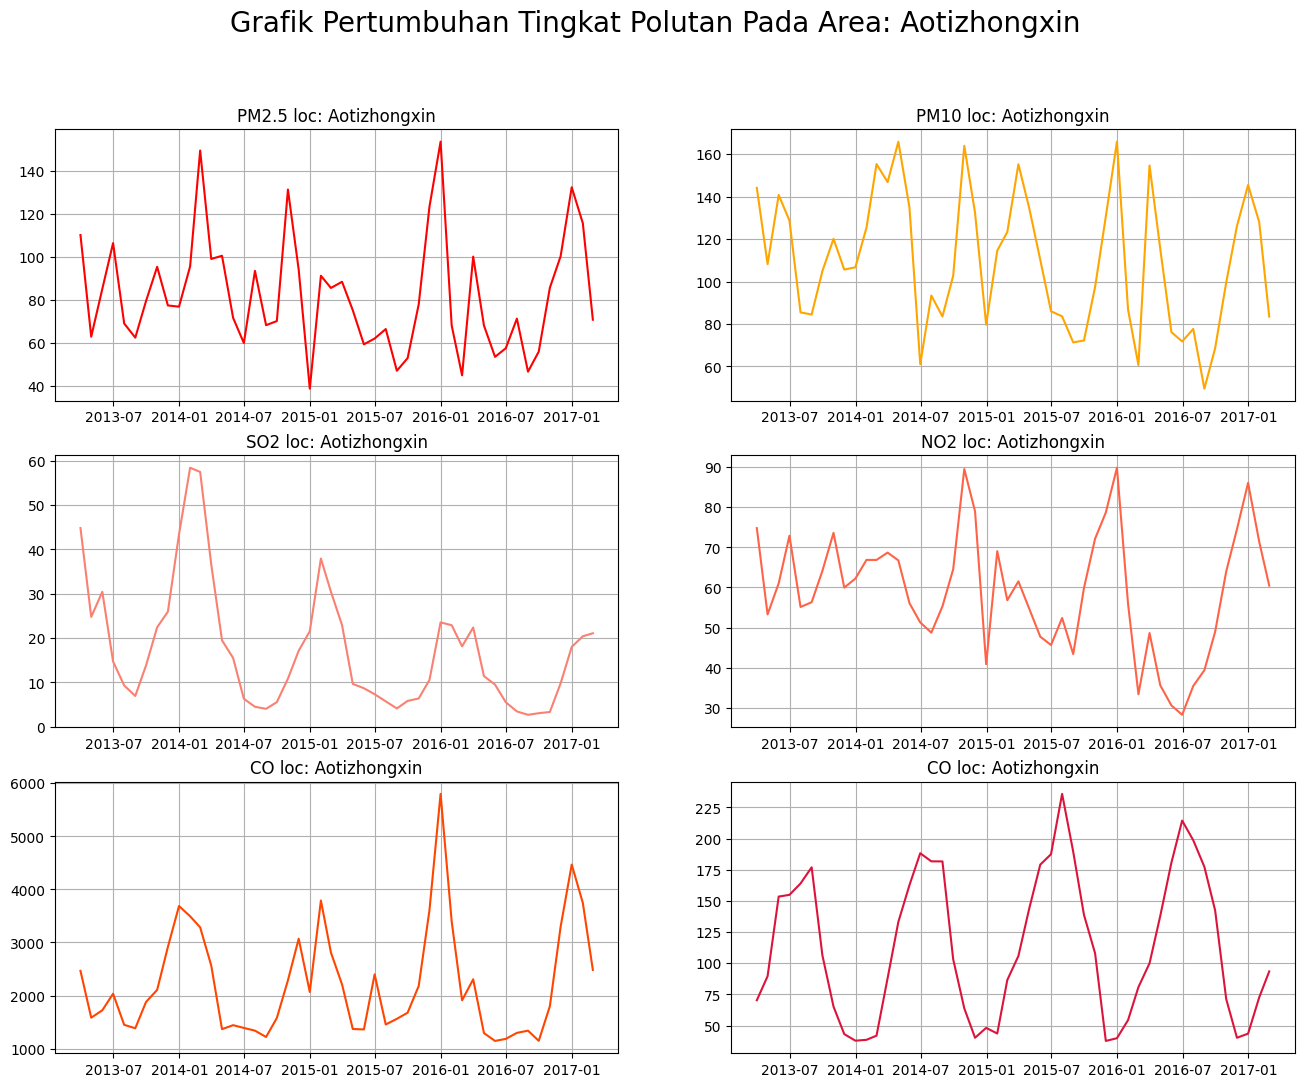

In [601]:
fig,ax = plt.subplots(ncols = 2, nrows = 3, figsize=(16,12))
ax[0][0].plot(pollution_level_df.date, pollution_level_df[list_part[0]], color = 'red')
ax[0][0].set_title('{} loc: {}'.format(list_part[0],list_station[0]))
ax[0][0].grid()

ax[0][1].plot(pollution_level_df.date, pollution_level_df[list_part[1]], color = 'orange')
ax[0][1].set_title('{} loc: {}'.format(list_part[1],list_station[0]))
ax[0][1].grid()

ax[1][0].plot(pollution_level_df.date, pollution_level_df[list_part[2]], color = 'salmon')
ax[1][0].set_title('{} loc: {}'.format(list_part[2],list_station[0]))
ax[1][0].grid()

ax[1][1].plot(pollution_level_df.date, pollution_level_df[list_part[3]], color = 'tomato')
ax[1][1].set_title('{} loc: {}'.format(list_part[3],list_station[0]))
ax[1][1].grid()

ax[2][0].plot(pollution_level_df.date, pollution_level_df[list_part[4]], color = 'orangered')
ax[2][0].set_title('{} loc: {}'.format(list_part[4],list_station[0]))
ax[2][0].grid()

ax[2][1].plot(pollution_level_df.date, pollution_level_df[list_part[5]], color = 'crimson')
ax[2][1].set_title('{} loc: {}'.format(list_part[4],list_station[0]))
ax[2][1].grid()
plt.suptitle(f'Grafik Pertumbuhan Tingkat Polutan Pada Area: {list_station[0]}', fontsize = 20)
plt.show()

## 2. Pollution Region

Untuk polusi tiap daerah, akan dihasilkan suatu fungsi polusi terhadap fungsi region yang akan digambarkan melalui grafik bar

In [267]:
pollution_region_df = pollution_region(pollution_df)

In [1]:
colors = ['#8C000F']
for x in range(0,11):
    colors.append('#D3D3D3')
colors

['#8C000F',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3',
 '#D3D3D3']

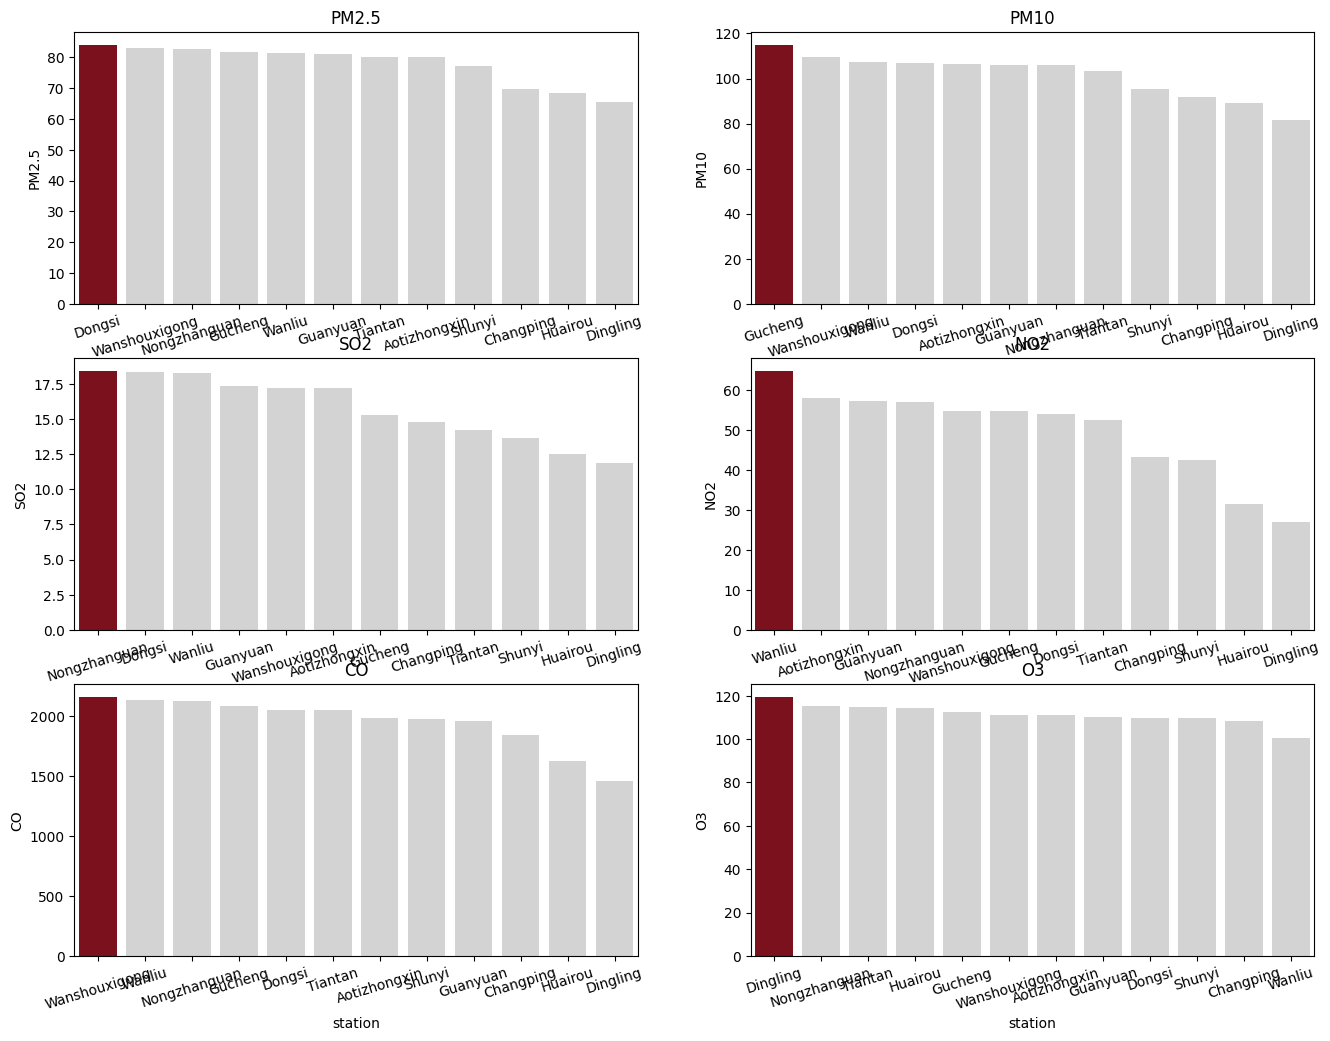

In [470]:
fig,ax = plt.subplots(ncols = 2, nrows = 3, figsize=(16,12))

sns.barplot(x="station", y=list_part[0], data=pollution_region_df.sort_values(by = list_part[0], ascending = False), 
            hue = "station", palette=colors, ax=ax[0][0])
ax[0][0].set_title('{}'.format(list_part[0]))
ax[0][0].tick_params(axis='x', labelrotation=17)

sns.barplot(x="station", y=list_part[1], data=pollution_region_df.sort_values(by = list_part[1], ascending = False), 
            hue = "station", palette=colors, ax=ax[0][1])
ax[0][1].set_title('{}'.format(list_part[1]))
ax[0][1].tick_params(axis='x', labelrotation=17)

sns.barplot(x="station", y=list_part[2], data=pollution_region_df.sort_values(by = list_part[2], ascending = False), 
            hue = "station", palette=colors, ax=ax[1][0])
ax[1][0].set_title('{}'.format(list_part[2]))
ax[1][0].tick_params(axis='x', labelrotation=17)

sns.barplot(x="station", y=list_part[3], data=pollution_region_df.sort_values(by = list_part[3], ascending = False), 
            hue = "station", palette=colors, ax=ax[1][1])
ax[1][1].set_title('{}'.format(list_part[3]))
ax[1][1].tick_params(axis='x', labelrotation=17)

sns.barplot(x="station", y=list_part[4], data=pollution_region_df.sort_values(by = list_part[4], ascending = False), 
            hue = "station", palette=colors, ax=ax[2][0])
ax[2][0].set_title('{}'.format(list_part[4]))
ax[2][0].tick_params(axis='x', labelrotation=17)

sns.barplot(x="station", y=list_part[5], data=pollution_region_df.sort_values(by = list_part[5], ascending = False), 
            hue = "station", palette=colors, ax=ax[2][1])
ax[2][1].set_title('{}'.format(list_part[5]))
ax[2][1].tick_params(axis='x', labelrotation=17)
plt.show()

# 3. Pollution Particle

Digunakan grafik bar untuk menggambarkan bagaimana AQI dari tiap polutan dan pie untuk menggambarkan konsentrasi dari tiap partikel polutan

In [589]:
#mengurutkan aqi index dan membuat warna untuk barplot
aqi_index_df.sort_values(by='AQI index', axis=1, inplace=True)
color_dict = {'good': '#008000', 'moderate': '#FFA500', 'quite unhealthy': '#F97306',
              'unhealthy': '#EF4026', 'very unhealthy': '#800000', 'hazardous': 'black'}
colors_aqi = []
for category in aqi_index_df.iloc[2]:
    colors_aqi.append(color_dict[category.lower()])


Text(0.5, 1.0, 'Air Quality Index (China)')

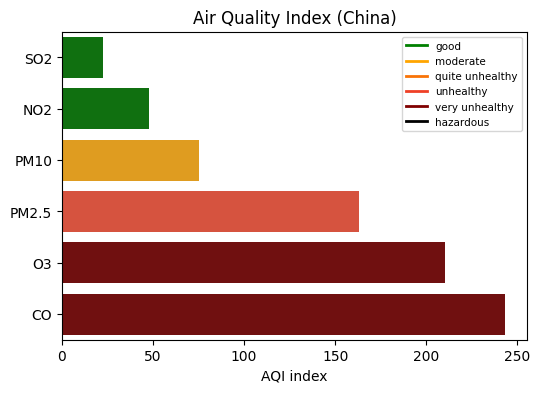

In [602]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(y=aqi_index_df.iloc[1].index, x=aqi_index_df.iloc[1], 
            ax = ax, hue = aqi_index_df.iloc[1].sort_values().index, palette = colors_aqi )
ax.set_ylabel('')
plt.legend(labels=color_dict.keys(),
           handles=[plt.Line2D([0], [0], color=value, lw=2) 
                    for value in color_dict.values()], fontsize = 7.5)
ax.set_title('Air Quality Index (China)')

In [518]:
aqi_index_df.iloc[0].sort_values(ascending=False).index

Index(['CO', 'O3', 'PM10', 'PM2.5', 'NO2', 'SO2'], dtype='object')

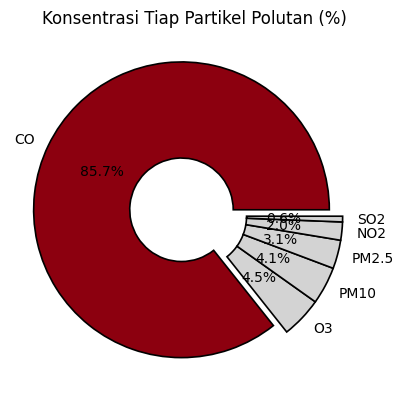

In [527]:
plt.pie(
    labels=aqi_index_df.iloc[0].sort_values(ascending = False).index.tolist(),
    x=aqi_index_df.iloc[0].sort_values(ascending = False).tolist(),
    autopct='%1.1f%%',
    colors = colors,
    explode = [0.1,0,0,0,0,0],
    wedgeprops = {'width': 0.65,"edgecolor":"black", 
                     'linewidth': 1.2, 
                     'antialiased': True})
plt.title('Konsentrasi Tiap Partikel Polutan (%)')
plt.show()

# Kesimpulan

## Kesimpulan 1

Hasil dari visualisasi di atas menunjukkan pertumbuhan konsentrasi polutan pada tiap bulannya. Ditunjukkan bahwa terdapat sebuah pola periodik dari konsentrasi polutan pada wilayah Aotizhongxin. Pertumbuhan konsentrasi polutan pada stasiun pengamatan lain dapat diamati lebih lanjut pada dashboard

## Kesimpulan 2

Tiap daerah memiliki konstribusi sendiri terhadap produksi polutan, dengan rata-rata konsentrasi polutan terbanyak pada tiap daerah yakni:

- PM2.5: Dongshi
- PM10: Gucheng
- SO2: Nongzhangguan
- NO2: Wanliu
- CO: Wanshouxinggong
- O3: Dingling

Investigasi terhadap tiap titik diperlukan untuk dapat mengetahui penyebab dari tingginya nilai konsentrasi. Perlu diperhatikan bahwa terdapat wilayah dengan beda nilai produksi polutan yang relatif kecil sehingga wilayah ini tidak bisa luput dari investigasi

## Kesimpulan 3

Ditunjukkan bahwa nilai CO memiliki persentase tertinggi dari partikel polutan lainnya. Namun bahaya dari tiap polutan diindikasikan melalui nilai AQI yang menunjukkan bahwa konsentrasi CO dan O3 telah mencapai indikator Sangat Tidak Sehat sementara konsentrasi PM10 mencapai indikator Tidak Sehat.

# Dashboard 

In [606]:
pollution_df.head()

,station,date,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-03-01,7.125000,10.750000,11.708333,22.583333,700.0,77.0
1,Aotizhongxin,2013-03-02,30.750000,42.083333,36.625000,66.666667,1700.0,52.0
2,Aotizhongxin,2013-03-03,76.916667,120.541667,61.291667,81.000000,2799.0,77.0
3,Aotizhongxin,2013-03-04,22.708333,44.583333,22.869565,46.956522,1300.0,84.0
4,Aotizhongxin,2013-03-05,148.875000,183.791667,93.875000,132.833333,4400.0,84.0


In [307]:
pollution_df.to_csv('./dashboard/pollution_data.csv', index = False)